# Capstone Project Part 1: Python

## Imports and Setup

In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import ast

movie_df=pd.read_csv("DS1_C7_Part1_Data Analysis Using Python_Dataset.csv")

#### Defined Functions

In [2]:
#the function is used multiple times throughout the project to extract clean displays of titles and associated genres#

def extract_title_genres_df(df):
    extracted_genre_dict={}
    for index,row in df.iterrows(): #allows specificity in rows when iterating over data set#
        extract_genre_list=[] 
        for genre in ast.literal_eval(row["genres"]): #allows evaluation of the dictionaries within column lists#
            extract_genre_list.append(genre["name"]) #feeds values into above list to use for title key later#
            extracted_genre_dict[row["title"]]=", ".join(extract_genre_list) #creates string of list and pairs it to title#
    extracted_df=pd.DataFrame(extracted_genre_dict.items(),columns=["Movie Title","Genre"]) #creates df out of dictionary#
    return extracted_df

### Task 1 - Top 50 Movies

In [3]:
top_50_movies=movie_df.loc[:,["genres","title"]].head(50)

print("The dataframe has",movie_df.shape[0],"rows, and",movie_df.shape[1],"columns.","\n")

print("The first 50 movies in the dataframe are as follows:")
extract_title_genres_df(top_50_movies)

The dataframe has 4803 rows, and 20 columns. 

The first 50 movies in the dataframe are as follows:


,Movie Title,Genre
0,Avatar,"Action, Adventure, Fantasy, Science Fiction"
1,Pirates of the Caribbean: At World's End,"Adventure, Fantasy, Action"
2,Spectre,"Action, Adventure, Crime"
3,The Dark Knight Rises,"Action, Crime, Drama, Thriller"
4,John Carter,"Action, Adventure, Science Fiction"
5,Spider-Man 3,"Fantasy, Action, Adventure"
6,Tangled,"Animation, Family"
7,Avengers: Age of Ultron,"Action, Adventure, Science Fiction"
8,Harry Potter and the Half-Blood Prince,"Adventure, Fantasy, Family"
9,Batman v Superman: Dawn of Justice,"Action, Adventure, Fantasy"


### Task 2 - Null Values and Imputation

#### Task 2: Initial Null Value Display

In [4]:
movie_df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

#### Task 2: Imputation Coding

In [5]:
#predominantly, it is the 'homepage' and 'tagline' columns that have the missing values at 3091 and 844, respectively#
#as these and the 3 from 'overview' are not necessary for our analysis, a placeholder of 'N/A' has been inserted#
#for the 1 missing data point in 'release_date' the internet was consulted for imputation#
#for the 2 missing data points in 'runtime' the average of the dataset was used#

#movie without release date: America is Still the Place#
movie_df.loc[movie_df["release_date"].isnull(),"release_date"]="01-01-2003"

#movies without run time: "Chiamatemi Francesco - Il Papa della gente" & "To Be Frank, Sinatra at 100"#
round(movie_df["runtime"].mean()) #107#
movie_df.loc[movie_df["runtime"].isnull(),"runtime"]=107

#remaining lines for all imputation of 'N/A' insertion#
movie_df.loc[movie_df["tagline"].isnull(),"tagline"]="N/A"
movie_df.loc[movie_df["homepage"].isnull(),"homepage"]="N/A"
movie_df.loc[movie_df["overview"].isnull(),"overview"]="N/A"

print("Post-imputation results in",movie_df.shape[0],"rows, and",movie_df.shape[1],"columns.","\n")

Post-imputation results in 4803 rows, and 20 columns. 



#### Task 2: Post-Imputation Null Value Display

In [6]:
movie_df.isnull().sum()

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
dtype: int64

### Task 3 - Categories with Budget over $220k

In [7]:
#Regarding both tasks 3 & 4:#
#both ask for 'categories' which is not a column present in the data set#
# for this code line, 'genres' is used to explore the question#

budget_over_220k=movie_df.loc[movie_df["budget"]>220000]

genre_set=set()

for items in budget_over_220k["genres"]:
    for genre in ast.literal_eval(items):
        genre_set.add(genre["name"])
        
budget_220k_genre_names=", ".join(genre_set)
print("The genres that have at least one movie with a budget over $220k are",budget_220k_genre_names)

The genres that have at least one movie with a budget over $220k are Crime, History, Music, Action, War, Western, Family, Drama, Foreign, Thriller, Fantasy, Horror, Adventure, Animation, Comedy, Mystery, TV Movie, Romance, Documentary, Science Fiction


In [8]:
#here the associated movie title and its various genres are displayed#

extract_title_genres_df(budget_over_220k)

,Movie Title,Genre
0,Avatar,"Action, Adventure, Fantasy, Science Fiction"
1,Pirates of the Caribbean: At World's End,"Adventure, Fantasy, Action"
2,Spectre,"Action, Adventure, Crime"
3,The Dark Knight Rises,"Action, Crime, Drama, Thriller"
4,John Carter,"Action, Adventure, Science Fiction"
...,...,...
3674,Malevolence,"Crime, Horror, Thriller"
3675,Super Hybrid,Horror
3676,The Birth of a Nation,Drama
3677,The Signal,"Thriller, Science Fiction"


### Task 4 - Categories with Revenue over $961m

In [9]:
revenue_over_961m=movie_df.loc[movie_df["revenue"]>961000000]

revenue_961m_genres=set()
for items in revenue_over_961m["genres"]:
    for genre in ast.literal_eval(items):
        revenue_961m_genres.add(genre["name"])

revenue_961m_genre_names=", ".join(list(revenue_961m_genres))
        
print("The genres that have at least one movie with a revenue over $961 million are",revenue_961m_genre_names)

The genres that have at least one movie with a revenue over $961 million are Fantasy, Crime, Family, Drama, Romance, Action, Thriller, Adventure, Science Fiction, Animation, Comedy


In [10]:
extract_title_genres_df(revenue_over_961m)

#for tasks 3 & 4, using movie titles and their genres seems to be much more informative#

,Movie Title,Genre
0,Avatar,"Action, Adventure, Fantasy, Science Fiction"
1,The Dark Knight Rises,"Action, Crime, Drama, Thriller"
2,Avengers: Age of Ultron,"Action, Adventure, Science Fiction"
3,Pirates of the Caribbean: Dead Man's Chest,"Adventure, Fantasy, Action"
4,The Avengers,"Science Fiction, Action, Adventure"
5,Pirates of the Caribbean: On Stranger Tides,"Adventure, Action, Fantasy"
6,Titanic,"Drama, Romance, Thriller"
7,Captain America: Civil War,"Adventure, Action, Science Fiction"
8,Jurassic World,"Action, Adventure, Science Fiction, Thriller"
9,Skyfall,"Action, Adventure, Thriller"


### Sub-Task Analysis: Sorting Most Popular Genres

In [118]:
#function called outside of defined function to allow further work with dataframe#
genre_count_dict={}
for items in revenue_over_961m["genres"]:
    for genre in ast.literal_eval(items):
        genre_count_dict[genre['name']]=genre_count_dict.get(genre['name'],0)+1
genre_count_df=pd.DataFrame(genre_count_dict.items(),columns=["Genre","Number in Top Movies"])
sorted_genre_count_top_revenue_df=genre_count_df.sort_values(
    by="Number in Top Movies",ascending=False,ignore_index=True)
sorted_genre_count_top_revenue_df

#of the top 23 moives with revenue over $961, the most popular genre is Adventure#
#after Adventure, Action is at second place#
#Followed by Fantasy and Science Fiction tied for third#

,Genre,Number in Top Movies
0,Adventure,18
1,Action,16
2,Fantasy,8
3,Science Fiction,8
4,Family,7
5,Thriller,5
6,Drama,4
7,Animation,4
8,Comedy,3
9,Crime,2


### Task 5 - Filtering Out Budget and Revenue with 0

In [13]:
#The dataframe began with 4803 rows#
#removing rows with 0 in either 'budget' or 'revenue' results in 3229 rows in the new dataframe#

movie_df.drop(movie_df[(movie_df["budget"]==0) | (movie_df["revenue"]==0)].index,inplace=True)
movie_df.shape

(3229, 20)

### Task 6 - Top 10 Revenues and Bottom 10 Budgets

In [14]:
top_10_highest_revenue=movie_df.sort_values(by='revenue',ascending=False).head(10)

print(f"The top 10 movie revenues:\n{top_10_highest_revenue['title']}","\n")

top_10_lowest_budgets=movie_df.sort_values(by='budget',ascending=False).tail(10)

print(f"The bottom 10 movie budgets:\n{top_10_lowest_budgets['title']}")

The top 10 movie revenues:
0                          Avatar
25                        Titanic
16                   The Avengers
28                 Jurassic World
44                      Furious 7
7         Avengers: Age of Ultron
124                        Frozen
31                     Iron Man 3
546                       Minions
26     Captain America: Civil War
Name: title, dtype: object 

The bottom 10 movie budgets:
1771        The 51st State
1912        Angela's Ashes
2933              F.I.S.T.
3131     Of Horses and Men
3137             Nurse 3-D
4608          The Prophecy
3372          Split Second
3419          Bran Nue Dae
3611    A Farewell to Arms
4238          Modern Times
Name: title, dtype: object


In [15]:
top_10_revenue_movies=list(top_10_highest_revenue["original_title"])
bottom_10_budget_movies=list(top_10_lowest_budgets["original_title"])

best_ratio_movies=[]
for movie in top_10_revenue_movies:
    if movie in bottom_10_budget_movies:
        best_ratio_movies.insert(movie)
best_ratio_movies

#There are no common movies between the lowest budget and highest revenue#

[]

### Task 7 - Correlation Heatmap

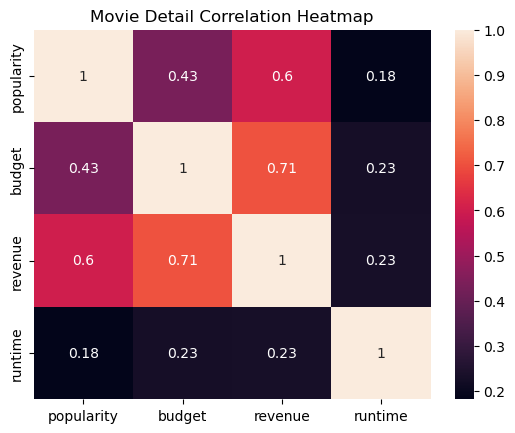

In [25]:
movie_correlations=movie_df[["popularity","budget","revenue","runtime"]].corr()
movie_heatmap=sbn.heatmap(movie_correlations,annot=True)

movie_heatmap.set_title("Movie Detail Correlation Heatmap")
plt.show()

#### Task 7: Scatter Plot Correlation

<AxesSubplot:xlabel='budget', ylabel='popularity'>

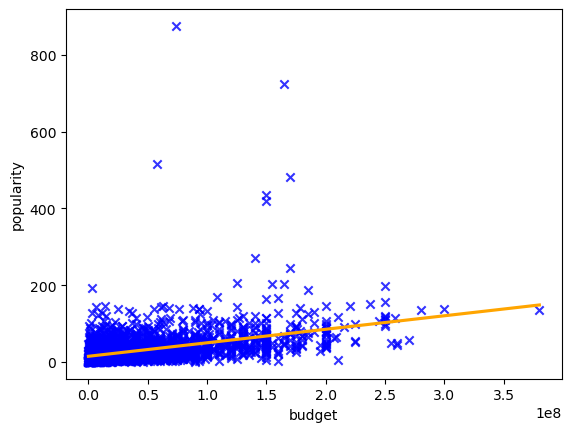

In [17]:
sbn.regplot(x="budget",
          y="popularity",
          ci= None,
          data=movie_df,
          marker="x",
          scatter_kws={"color": "blue"}, 
          line_kws={"color": "orange"})

#The 'budget' and 'popularity' of a movie seem to be somewhat moderately related#
#Though a movie may have a large budget, it does not necessarily mean it will appeal to all audiences#
#Budget may help make a movie more appealing by providing special effects and procuring quality cast and writing staff#
#If the budget is not used to analyze what is currently in vogue, the film may still flop#
#Final analysis: Though money can help acquire what is useful for quality, it must be used wisely to help ensure success#

### Task 8 - Production Company Counts

In [18]:
prod_companies_dict={}

#ast.literal_eval() allows Python to look into each item iterated on as the individual type it is instead of just one list#
#it lets us pull each "name" key from the dictionaries even though they are bound in a list#
for items in movie_df["production_companies"]:
    for company in ast.literal_eval(items):
        prod_companies_dict[company['name']]=prod_companies_dict.get(company['name'],0)+1
        #adds running count for each individual company name in the column#

production_companies_df=pd.DataFrame(prod_companies_dict.items(),columns=["Production Company","Movies Produced"])

verify_length_of_production_companies=production_companies_df["Production Company"].unique().shape[0]
print(f"There are now {verify_length_of_production_companies} unique rows for the data.")
print(production_companies_df)

There are now 3564 unique rows for the data.
                          Production Company  Movies Produced
0                    Ingenious Film Partners               24
1     Twentieth Century Fox Film Corporation              201
2                         Dune Entertainment               54
3                   Lightstorm Entertainment                5
4                       Walt Disney Pictures               96
...                                      ...              ...
3559                             Tiny Ponies                1
3560                         Low Spark Films                1
3561                       Signal Film Group                1
3562                   Dreamland Productions                1
3563                           Daiei Studios                1

[3564 rows x 2 columns]


### Task 9 - Top 25 Production Companies

In [19]:
#using the dataframe produced in task 8, the data simply needs to be sorted and displayed to the limit requested#

top_25_production_companies=production_companies_df.sort_values(by="Movies Produced",ascending=False).head(25)

print("The top 25 production companies and how many movies they have produced:\n",top_25_production_companies)

The top 25 production companies and how many movies they have produced:
                           Production Company  Movies Produced
11                              Warner Bros.              280
52                        Universal Pictures              273
38                        Paramount Pictures              245
1     Twentieth Century Fox Film Corporation              201
7                          Columbia Pictures              167
46                           New Line Cinema              142
54                          Relativity Media              100
4                       Walt Disney Pictures               96
193                      Touchstone Pictures               93
49                 Metro-Goldwyn-Mayer (MGM)               92
250            Columbia Pictures Corporation               86
112                Village Roadshow Pictures               73
384                            Miramax Films               67
80                            DreamWorks SKG               

### Task 10 - Central Tendencies and Outliers

#### Task 10: Budget

The average budget of the top 500 movies: $103193736
The median budget of the top 500 movies: $95000000
The most common budget of the top 500 movies: $150000000


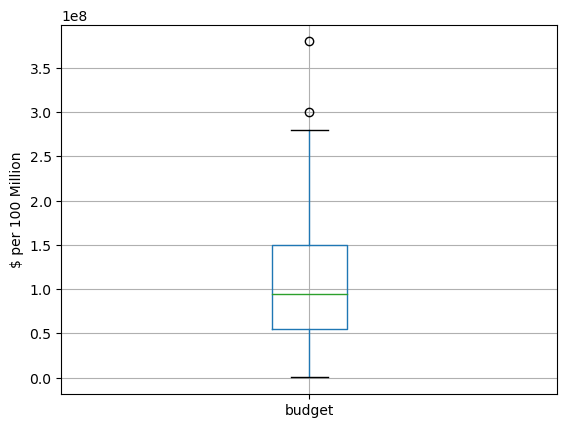

In [20]:
top_500_by_revenue=movie_df.sort_values(by="revenue",ascending=False).head(500)

top_500_mean_budget=top_500_by_revenue["budget"].mean()
top_500_median_budget=top_500_by_revenue["budget"].median()
#mode is in form of list to not return the 0 from single mode#
top_500_mode_budget=list(top_500_by_revenue["budget"].mode())

print(f"The average budget of the top 500 movies: ${round(top_500_mean_budget)}")
print(f"The median budget of the top 500 movies: ${round(top_500_median_budget)}")
print(f"The most common budget of the top 500 movies: ${top_500_mode_budget[0]}") #[0] used to clean up brackets from lsit#

top_500_by_revenue.boxplot(column=["budget"]).set_ylabel("$ per 100 Million")
plt.show()

#### Task 10: Revenue

The average revenue of the top 500 movies: $458577595
The median revenue of the top 500 movies: $363001570
The most common revenue of the top 500 movies:
0       217764291
1       218340595
2       218613188
3       219076518
4       219103655
          ...    
495    1506249360
496    1513528810
497    1519557910
498    1845034188
499    2787965087
Name: revenue, Length: 500, dtype: int64


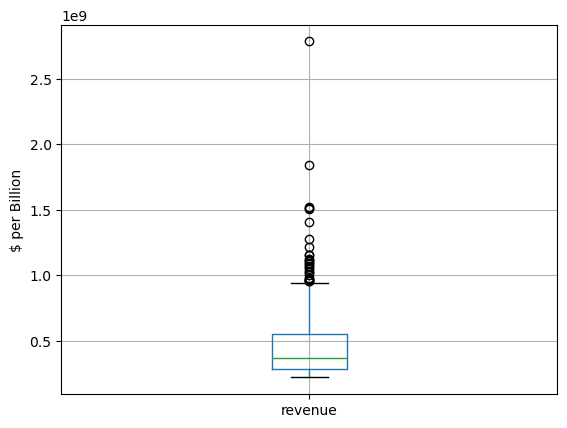

In [21]:
top_500_mean_revenue=top_500_by_revenue["revenue"].mean()
top_500_median_revenue=top_500_by_revenue["revenue"].median()
top_500_mode_revenue=top_500_by_revenue["revenue"].mode()

print(f"The average revenue of the top 500 movies: ${round(top_500_mean_revenue)}")
print(f"The median revenue of the top 500 movies: ${round(top_500_median_revenue)}")
#multiple modes are displayed for "revenue", because each revenue line is unique#
print(f"The most common revenue of the top 500 movies:\n{top_500_mode_revenue}")

top_500_by_revenue.boxplot(column=["revenue"]).set_ylabel("$ per Billion")
plt.show()

#### Task 10: Runtime

The average runtime of the top 500 movies: 119 minutes
The median runtime of the top 500 movies: 116 minutes
The most common runtime of the top 500 movies: 115.0 minutes


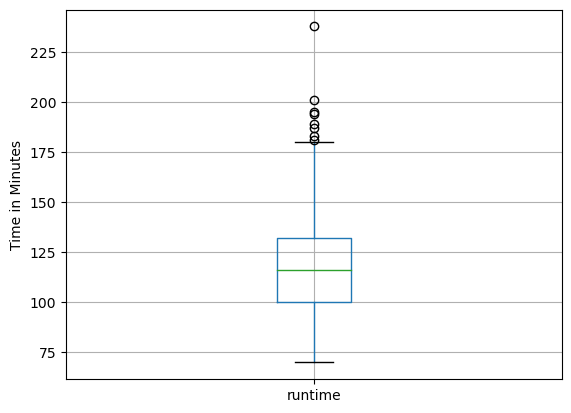

In [22]:
top_500_mean_runtime=top_500_by_revenue["runtime"].mean()
top_500_median_runtime=top_500_by_revenue["runtime"].median()
top_500_mode_runtime=list(top_500_by_revenue["runtime"].mode())

print(f"The average runtime of the top 500 movies: {round(top_500_mean_runtime)} minutes")
print(f"The median runtime of the top 500 movies: {round(top_500_median_runtime)} minutes")
print(f"The most common runtime of the top 500 movies: {top_500_mode_runtime[0]} minutes")

top_500_by_revenue.boxplot(column=["runtime"]).set_ylabel("Time in Minutes")
plt.show()

#regarding outliers: I do not believe that for this particular set of tasks removing outliers is a valuable step#
#If future decisions were to be made with the data, reassesment of the outlier skew would be revisited#

### Task 11 - Top 500 Movies & Above Average Runtime

In [23]:
###########
# TASK 11 #
###########

top_500_above_average_runtime=top_500_by_revenue.loc[top_500_by_revenue["runtime"]>top_500_mean_runtime]

sorted_above_average_runtime=top_500_above_average_runtime[["title","runtime"]].sort_values(by="runtime",ascending=False)

print("Movies from the 500 with the highest revenue with above average runtimes:\n",sorted_above_average_runtime)

Movies from the 500 with the highest revenue with above average runtimes:
                                               title  runtime
3813                             Gone with the Wind    238.0
329   The Lord of the Rings: The Return of the King    201.0
1818                               Schindler's List    195.0
25                                          Titanic    194.0
690                                  The Green Mile    189.0
...                                             ...      ...
2668                                   Pretty Woman    119.0
245                             Tomorrow Never Dies    119.0
2667                               Fatal Attraction    119.0
249                                       Insurgent    119.0
1987                           Howl's Moving Castle    119.0

[234 rows x 2 columns]
